# Explore disaster dataset visually

### Setup

In [406]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
filepath_source_all = Path("data/processed/disaster/disaster-all.csv")
filepath_source_global = Path("data/processed/disaster/disaster-global.csv")
filepath_source_country = Path('data/processed/disaster/disaster-country.csv')
filepath_source_region = Path("data/processed/disaster/disaster-region.csv")

## Global disaster data

In [435]:
dis_global = pd.read_csv(filepath_source_global)

### Basic understanding

In [436]:
dis_global.shape

(14871, 4)

In [437]:
dis_global.dtypes

year        int64
type       object
subtype    object
deaths      int64
dtype: object

In [438]:
dis_global.head(8)

,year,type,subtype,deaths
0,1900,Drought,Drought,11000
1,1900,Drought,Drought,1250000
2,1902,Earthquake,Ground movement,2000
3,1902,Volcanic activity,Ash fall,1000
4,1902,Volcanic activity,Ash fall,6000
5,1903,Mass movement (dry),Rockfall,76
6,1903,Volcanic activity,Ash fall,17
7,1904,Storm,Tropical cyclone,0


We remove White-Spaces from type as well as subtype for more convenience


In [445]:
dis_global["type"] = dis_global["type"].apply(lambda x: x.replace(" ", "_") if x[-1] != ' ' else x.replace(" ", "_"))
dis_global['subtype'].replace(" ", "_", inplace=True, regex=True)
dis_global["type"] = dis_global["type"].apply(lambda x: x.rstrip("_"))

### Feature understanding

How often do the various types of natural disaster occur ?

In [446]:
dis_global["type"].value_counts()

Flood                    5744
Storm                    4582
Earthquake               1579
Drought                   792
Landslide                 792
Extreme_temperature       607
Wildfire                  453
Volcanic_activity         270
Mass_movement_(dry)        48
Glacial_lake_outburst       3
Fog                         1
Name: type, dtype: int64

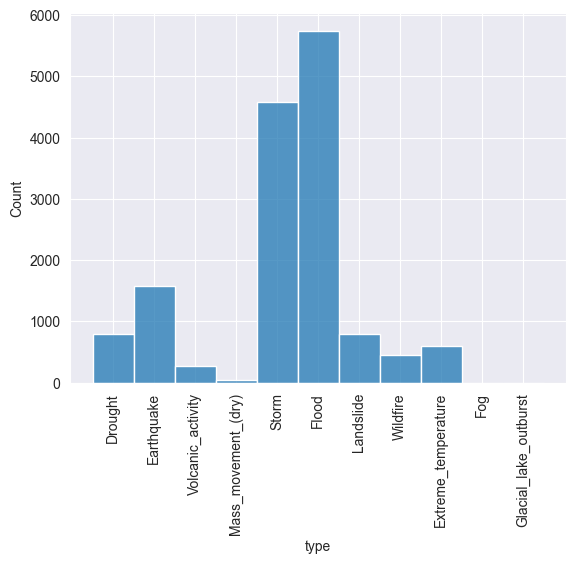

In [447]:
hist = sns.histplot(data=dis_global, x="type")
hist.tick_params(axis='x', rotation=90)
plt.show()

Storms and Floods occur by far the most often while disasters like droughts, earthquakes occur fewer times.
The other types of disasters are very rare with only 3 recorded observations of glacial lake outbursts.
Living next to the water seems to be dangerous !

Which types of natural disasters cause the most deaths ?

In [448]:
dis_deaths_by_type = dis_global.groupby(["type"])
dis_deaths_by_type = dis_deaths_by_type.sum(numeric_only=True).drop("year", axis=1)
dis_deaths_by_type

,deaths
type,
Drought,11733889
Earthquake,2343912
Extreme_temperature,194056
Flood,7002992
Fog,4000
Glacial_lake_outburst,262
Landslide,67477
Mass_movement_(dry),4644
Storm,1403609


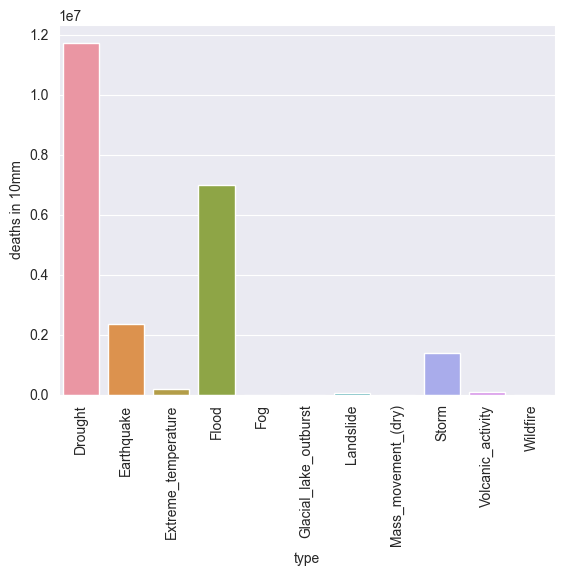

In [449]:
barplot = sns.barplot(data=dis_deaths_by_type.reset_index(), x="type", y="deaths")
barplot.tick_params(axis='x', rotation=90)
barplot.set_ylabel("deaths in 10mm")
plt.show()

As expected the cumulative deaths by flood are high with around 7 million people dying in the last 100 years.
The most significant insight here is that droughts have the highest death toll of all disasters with almost 11 mio people dying in the same timeframe. This is remarkable since droughts were only the fifth most common disaster. Storms, which occurred almost als often as floods have a relatively low death toll and are even superseded by the number of people dying from earthquakes.

The lethality of droughts is the most surprising or in this case shocking point.
More people dyed from droughts, probably following week long starvation, than from all other disasters combined.
There is one caveat though: Droughts are not necessarily the result of natural events but rather can be and have been caused by political failure or even have been weaponized by states.

We can also indentify the following types as the main contributors to human deaths by natural disasters:

- Drought
- Flood
- Earthquake
- Storm
- Extreme temperature

In addition to the most lethal disasters, we also choose to include Extreme temperature into our closer examination, since we suspect it to be related to the rising global temperature.
We will take a closer look at those types of disasters in the following.


So lets see what the most lethal disasters of the last one hundred years have been

In [450]:
dis_global.sort_values(by="deaths", ascending = False).drop("subtype", axis=1).head(10)

,year,type,deaths
95,1931,Flood,3700000
81,1928,Drought,3000000
272,1959,Flood,2000000
137,1943,Drought,1900000
354,1965,Drought,1500000
130,1942,Drought,1500000
1,1900,Drought,1250000
849,1921,Drought,1200000
123,1939,Flood,500000
48,1920,Drought,500000


The 10 most lethal disasters from the last 100 years have exclusively been floods and droughts.

The number one spot is a flood which happened 1931 in China and is known as the deadliest natural disaster of all time.

## Changes over time

### Frequeny

How did the frequency of natural disasters change over time ?

In [451]:
dis_freq_per_year = dis_global.groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_freq_per_year.rename(columns={'type':'recorded disasters'}, inplace=True)

In [452]:
dis_freq_per_year.head(8)

,recorded disasters
year,
1900,6
1901,1
1902,10
1903,12
1904,4
1905,8
1906,13
1907,2


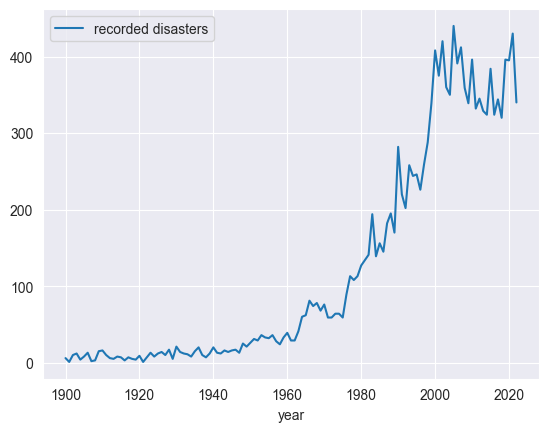

In [453]:
sns.lineplot(data = dis_freq_per_year)
plt.show()

We can clearly see that the number of recorded disasters skyrocketed over the last 100 years.
This is most likely not because there are this much more disasters happening (which affected people), but rather due to states or other institutions increasing their monitoring and taking recording of natural disasters seriously.

### Death toll

In [454]:
dis_deaths_per_year = dis_global.groupby('year').sum(numeric_only=True)

In [455]:
dis_deaths_per_year.head(8)

,deaths
year,
1900,1267470
1901,18
1902,48438
1903,7136
1904,152
1905,20987
1906,33657
1907,13200


In [456]:
dis_deaths_per_year.tail(8)

,deaths
year,
2015,22874
2016,8356
2017,9766
2018,11781
2019,11943
2020,15117
2021,10532
2022,13503


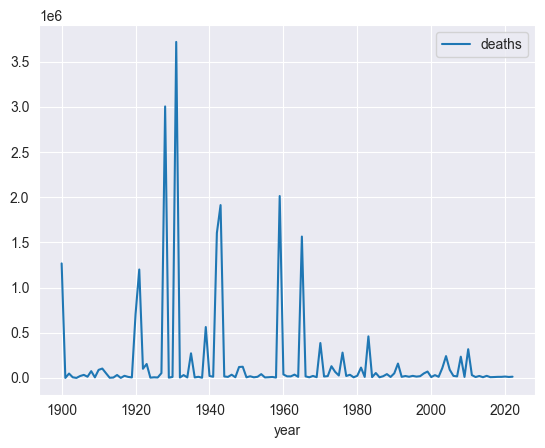

In [457]:
sns.lineplot(data = dis_deaths_per_year)
plt.show()

This is unexpected. We saw that the frequency of recorded disasters increased strongly over the past 100 years.
But number of people dying from natural disasters certainly has not.
We can also see that those are not linear trends. In certain periods of time, disasters seem to occur that have a dramatically high death toll like in the 1920s-1940s and the 1960s. Other periods like the 1950s have almost no recorded deaths (compared to the significant ones). After that 1960s the recorded deaths per year never came close to that, with only minor spikes occurring in the 2000s.

The 1920s-1940s can maybe be explained due to historic events and their consequences, like the two world wars, the great depression and political systems collapsing all around the world.

For the major disasters happening in the 1960s it is not that obvious to come up with a causal reasoning.
This requires further research.

It is safe to say that humanity as a whole has improved significantly in preventing disasters with a death toll in the millions.

When comparing the deaths by disasters on a normal scale, to see trends, it might be a good idea to exclude those major disasters.

To express how severe the major disasters were in relation to the other disaster, we illustrate them in a boxplot.
All the upper outliers are disasters that were so deadly, that the year they occurred is defined by it with all other disasters paling in comparison. That is why some years are extreme outliers.

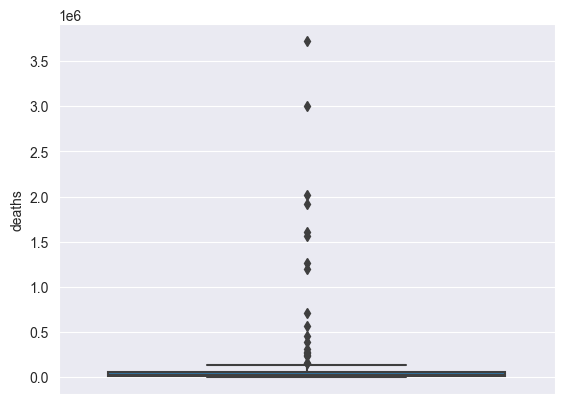

In [458]:
sns.boxplot( y=dis_deaths_per_year["deaths"] )
plt.show()

Disasters tend to show up periodically but not annually, so maybe it makes more sense for a boxplot to visualize the data grouped by decades, not years.

We exclude the 2020 decade since our data only contains disasters that happened before 2023.
It therefore makes not much sense to include them in the analysis where wo compare absolute occurrences or the sum of all deaths.

## Decades

### Frequency

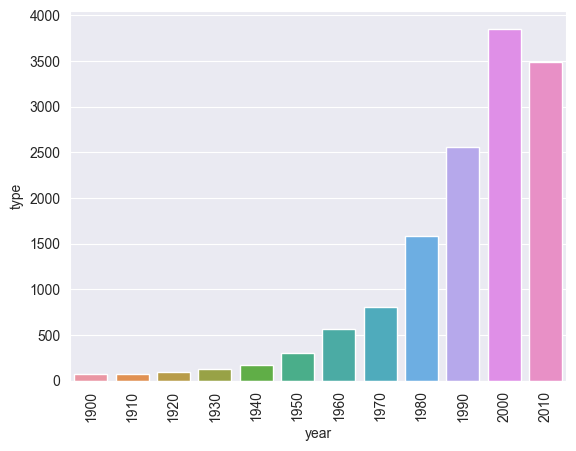

In [459]:
dis_freq_per_decade = dis_global.copy()
dis_freq_per_decade['year'] = dis_freq_per_decade['year'] - dis_freq_per_decade['year'] % 10
dis_freq_per_decade = dis_freq_per_decade.groupby('year')["type"].count()
dis_freq_per_decade.drop([2020], axis=0, inplace=True)
barplot = sns.barplot(data=dis_freq_per_decade.reset_index(), x="year", y="type")
barplot.tick_params(axis='x', rotation=90)
plt.show()

### Death toll

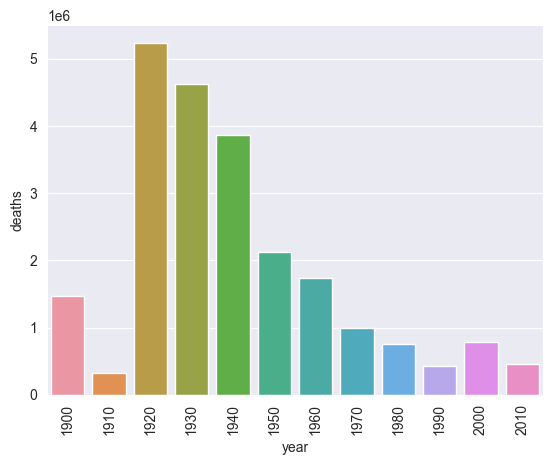

In [460]:
dis_deaths_per_decade = dis_global.copy()
dis_deaths_per_decade['year'] = dis_deaths_per_decade['year'] - dis_deaths_per_decade['year'] % 10
dis_deaths_per_decade = dis_deaths_per_decade.groupby('year').sum(numeric_only = True)
dis_deaths_per_decade.drop([2020], axis=0, inplace=True)
barplot = sns.barplot(data=dis_deaths_per_decade.reset_index(), x="year", y="deaths")
barplot.tick_params(axis='x', rotation=90)
plt.show()

By grouping the data by decades we should now be able to create a reasonable looking boxplot

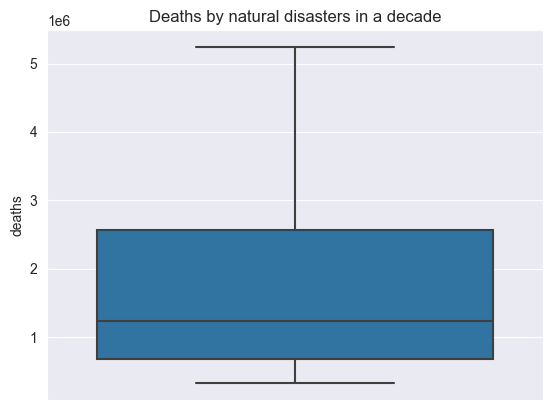

In [461]:
sns.boxplot( y=dis_deaths_per_decade["deaths"]).set(title='Deaths by natural disasters in a decade')
plt.show()

Are there differences in the number of recorded incidents and deaths for different types of disasters ?

### Droughts

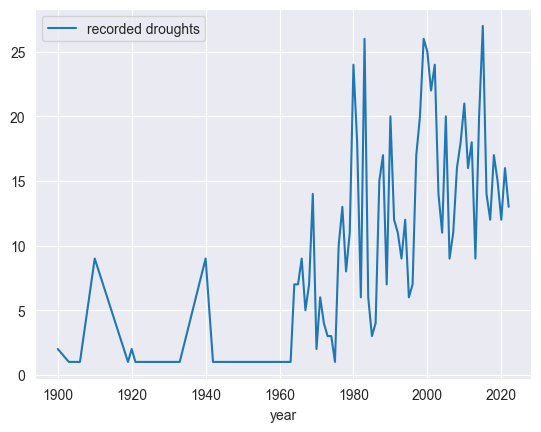

In [462]:
dis_droughts_per_year = dis_global[dis_global.type=="Drought"].groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_droughts_per_year.rename(columns={'type':'recorded droughts'}, inplace=True)
sns.lineplot(data = dis_droughts_per_year)
plt.show()

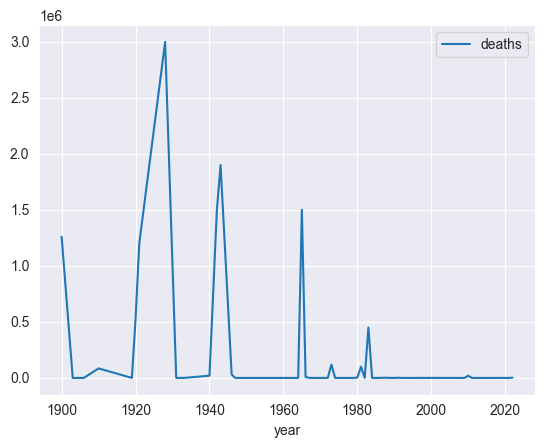

In [463]:
dis_deaths_by_droughts_per_year = dis_global[dis_global.type=="Drought"].groupby('year').sum(numeric_only=True)
sns.lineplot(data = dis_deaths_by_droughts_per_year)
plt.show()

The number of recorded droughts has increases but the number of recorded deaths has decreased.
In 40 years no drought has really caused a significant amount of deaths.

In the 1920s and the early 1940s extremely lethal droughts occurred.
This is also what we saw previously.

### Floods

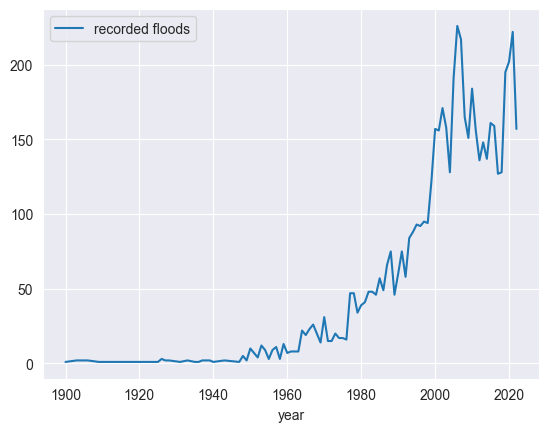

In [464]:
dis_floods_per_year = dis_global[dis_global.type=="Flood"].groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_floods_per_year.rename(columns={'type':'recorded floods'}, inplace=True)
sns.lineplot(data = dis_floods_per_year)
plt.show()

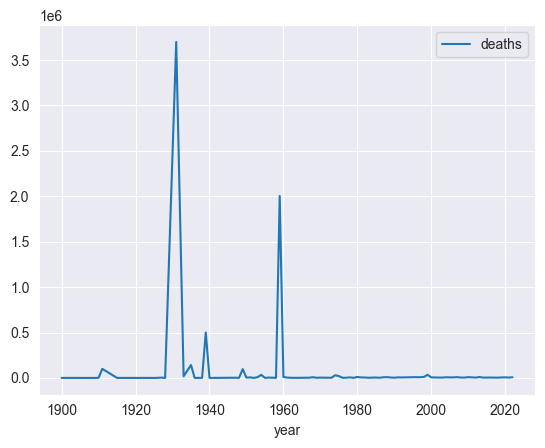

In [465]:
dis_deaths_by_floods_per_year = dis_global[dis_global.type=="Flood"].groupby('year').sum(numeric_only=True)
sns.lineplot(data = dis_deaths_by_floods_per_year)
plt.show()

The number of recorded incidents of floods are increasing, like for the other types or recorded disasters in general.
We can see that the most lethal floods have occurred in the early 1930s (e.g. China-Flood) as well as the early 1960s.

Unlike the other types of disaster, floods do not cause a high number of humans lives in other periods, with the annual death toll being negligible for other time spans.
Since the 1960s no flood has ever caused a high number of human casualties again.
This might be due to more modern ways of predicting floods earlier as well as people being cautious to live in areas where floods are likely and lethal.

### Earthquakes

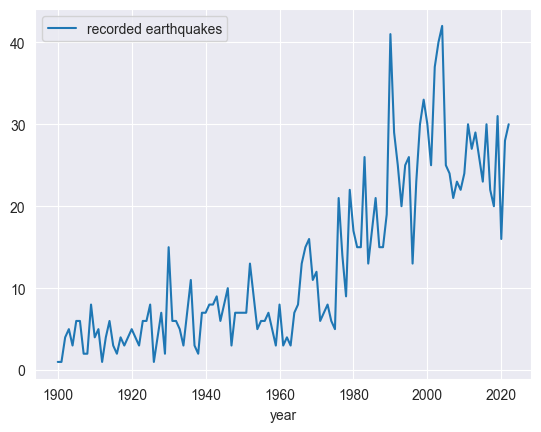

In [466]:
dis_earthquakes_per_year = dis_global[dis_global.type=="Earthquake"].groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_earthquakes_per_year.rename(columns={'type':'recorded earthquakes'}, inplace=True)
sns.lineplot(data = dis_earthquakes_per_year)
plt.show()

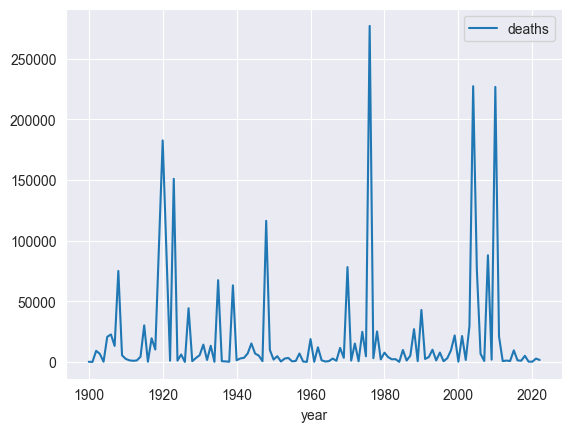

In [467]:
dis_deaths_by_earthquakes_per_year = dis_global[dis_global.type=="Earthquake"].groupby('year').sum(numeric_only=True)
sns.lineplot(data = dis_deaths_by_earthquakes_per_year)
plt.show()

The frequency of all recorded disaster has drastically increased over the last 100 years, but earthquakes seem to be the one disaster type people have been somewhat reliably tracking even in the first part of the 19th century.
It still increased, but not as drastically as the other ones.

The recorded deaths per year spiked again in the 1920s, like almost all other types of disasters but also in the late 1970s and the 2000s.

Here we can see that the spikes in deaths we saw earlier in the 2000s probably are caused by those earthquakes.
A reason might be that droughts and floods are easier to prevent with modern technology or global aid programs, while earthquakes are more difficult to prevent even in our modern world.
They are still nowhere nearly as deadly as the floods and droughts 50 years earlier have been.

### Extreme temperature

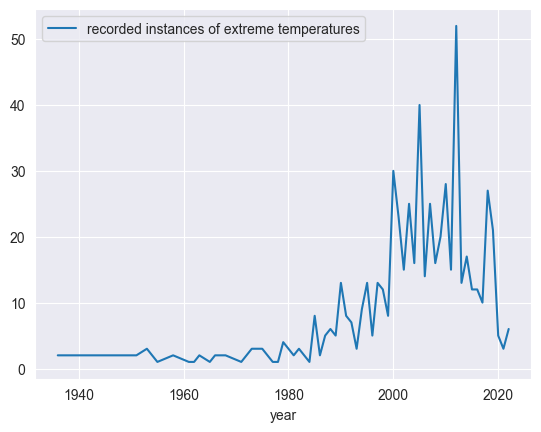

In [469]:
dis_extemp_freq_per_year = dis_global[dis_global.type=="Extreme_temperature"].groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_extemp_freq_per_year.rename(columns={'type':'recorded instances of extreme temperatures'}, inplace=True)
sns.lineplot(data = dis_extemp_freq_per_year)
plt.show()

In [470]:
dis_global.type.unique()

array(['Drought', 'Earthquake', 'Volcanic_activity',
       'Mass_movement_(dry)', 'Storm', 'Flood', 'Landslide', 'Wildfire',
       'Extreme_temperature', 'Fog', 'Glacial_lake_outburst'],
      dtype=object)

We can observe that like most other disasters, extreme weather as a natural disaster was not even recorded prior to the 1940s. Furthermore, occurrences in a decently sized annual number have only started to appear since the start of the 1980s.

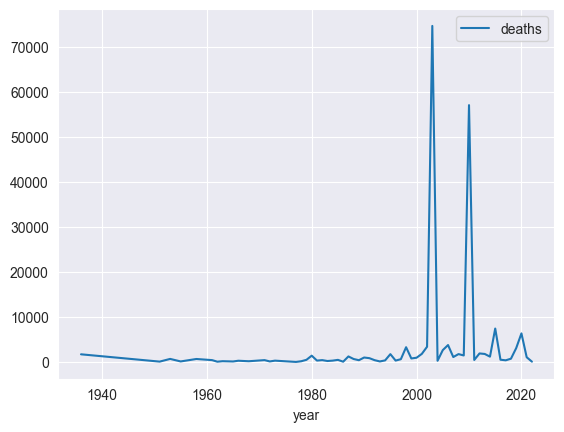

In [471]:
dis_extemp_deaths_per_year = dis_global[dis_global.type=="Extreme_temperature"].groupby('year').sum(numeric_only=True)
dis_extemp_deaths_per_year.head()
dis_extemp_deaths_per_year.rename(columns={'type':'recorded extreme temperatures'}, inplace=True)
sns.lineplot(data = dis_extemp_deaths_per_year)
plt.show()

The plot shows that almost nobody died as a result of extreme weather conditions prior to the year 2000.
While the deaths increased over time from 2000 until now, 2 years with an exorbitant death toll stand out in particular.

In [472]:
dis_extemp_deaths_per_year.sort_values(by="deaths", ascending = False).head(3)

,deaths
year,
2003,74698
2010,57088
2015,7425


Upon closer inspection we see that the years 2003 and 2010 have a death toll that is bigger than all other by orders of magnitude.
I suspect that these high numbers of deaths were caused by heat waves, since they are by far the most deadly.

In [473]:
dis_extemp_deaths = dis_global[dis_global.subtype=="Heat_wave"]
dis_extemp_deaths.sort_values(by="deaths", ascending = False).head(3)

,year,type,subtype,deaths
10405,2010,Extreme_temperature,Heat_wave,55736
7566,2003,Extreme_temperature,Heat_wave,20089
7563,2003,Extreme_temperature,Heat_wave,19490


As expected, we see that the spikes in deaths in 2010 and 2003 were mainly caused by intense heat waves.
The surprise comes with location at the location. This all happened in europe, which was previously almost never had problems with people dying from natural disasters, excluding the time before the 1970s.
In 2003 europe saw the hottest summer recorded in Europe since at least 1540.

In [474]:
dis_global[dis_global.type=="Extreme_temperature"].subtype.unique()

array(['Heat_wave', 'Cold_wave', 'Severe_winter_conditions'], dtype=object)

Not all occurrence of extreme temperatures are heatwaves, there are also cold waves and severe winter conditions. Therefore, we look at how often each type occurred.

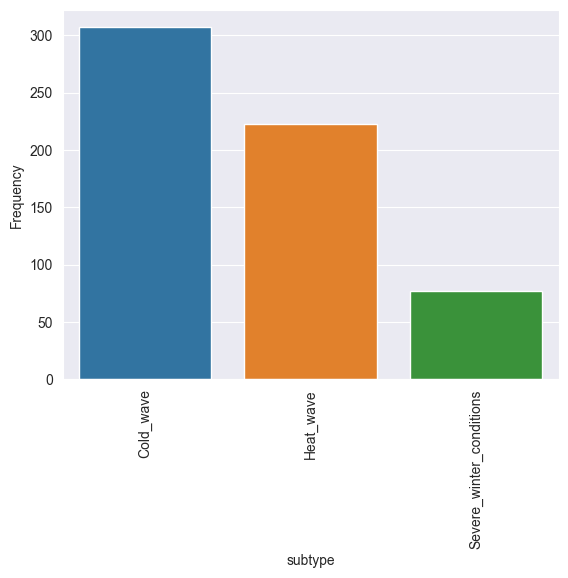

In [475]:
dis_extemp_freq_per_subtype = dis_global[dis_global.type=="Extreme_temperature"].reset_index().drop(columns=['year', 'deaths'], axis=1).groupby('subtype').count()
barplot = sns.barplot(data=dis_extemp_freq_per_subtype.reset_index(), x="subtype", y="type")
barplot.tick_params(axis='x', rotation=90)
barplot.set_ylabel("Frequency")
plt.show()

Cold waves are more common than heat waves but not by much.
Recorded instances of severe winter conditions are rare in comparison.
Nonetheless, we need to split the observations by subtype if we want to inspect the deaths by heat waves in relationship to rising global temperatures later on.

Number of occurrences of different subtypes of extreme weather conditions over time.

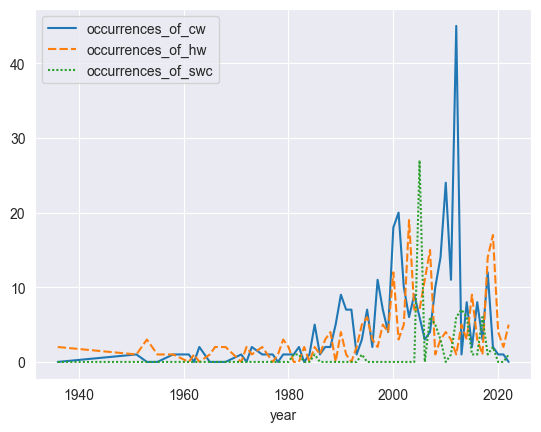

In [476]:
dis_coldwave_freq_per_year = dis_global[dis_global.subtype=="Cold_wave"].groupby('year').size().rename("occurrences_of_cw", inplace=True)
dis_heatwave_freq_per_year = dis_global[dis_global.subtype=="Heat_wave"].groupby('year').size().rename("occurrences_of_hw", inplace=True)
dis_swc_freq_per_year = dis_global[dis_global.subtype=="Severe_winter_conditions"].groupby('year').size().rename("occurrences_of_swc", inplace=True)
dis_freq_per_year_per_subtype = pd.concat([dis_coldwave_freq_per_year, dis_heatwave_freq_per_year, dis_swc_freq_per_year], axis=1).fillna(0)
sns.lineplot(data=dis_freq_per_year_per_subtype)
plt.show()

It is apparent that years with a exceptionally number of occurrences by cold waves are happening since the early 2000s, which can not be said about the other forms of extreme temperature.
Spikes in the number of heat waves per year have nonetheless become much more common in the 2000s and beyond.

Like most other disasters, tracking them reliably has only really started in the last 50 years.
With extreme weather conditions this is even more extreme, with observations only showing up in decent numbers around the 1990s. Surely extreme weather conditions have happened before in similar numbers but where probably not recorded.
This might be due to the nature of these kinds of disasters. An earthquake is much flashier in its effects, than really high temperatures around the country for several days or weeks. 95% of people could be totally fine when a heatwave in vienna is happening for example, with some people even enjoying it. This makes them nonetheless dangerous for a small number of vulnerable people, especially the elderly.

Death toll of different subtypes of extreme weather conditions split by subtypes.

In [477]:
dis_extemp_deaths_per_subtype = dis_global[dis_global.type=="Extreme_temperature"].reset_index().groupby('subtype').sum(numeric_only=True)
dis_extemp_deaths_per_subtype["deaths"].sort_values(ascending = False)

subtype
Heat_wave                   172555
Cold_wave                    17765
Severe_winter_conditions      3736
Name: deaths, dtype: int64

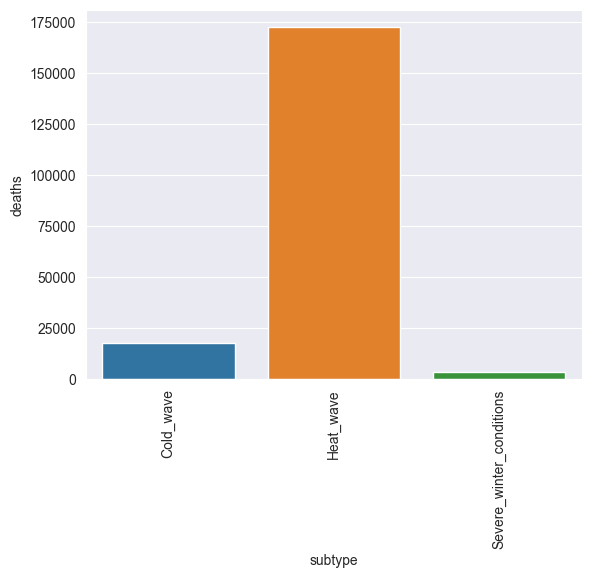

In [478]:
barplot = sns.barplot(data=dis_extemp_deaths_per_subtype.reset_index(), x="subtype", y="deaths")
barplot.tick_params(axis='x', rotation=90)
barplot.set_ylabel("deaths")
plt.show()

According to our data, Heat waves are by far the most dangerous subtype of extreme weather conditions, with over 90% of all deaths by this type of disasters caused by them.

### Death toll per year over time

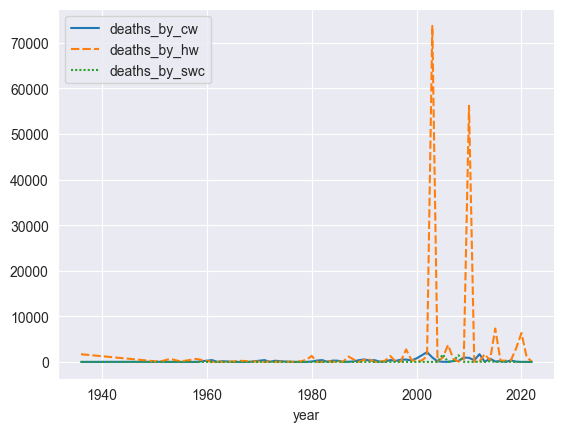

In [479]:
dis_coldwave_deaths_per_year = dis_global[dis_global.subtype=="Cold_wave"].groupby('year').sum(numeric_only=True)
dis_coldwave_deaths_per_year.rename(columns={"deaths":"deaths_by_cw"}, inplace=True)
dis_heatwave_deaths_per_year = dis_global[dis_global.subtype=="Heat_wave"].groupby('year').sum(numeric_only=True)
dis_heatwave_deaths_per_year.rename(columns={"deaths":"deaths_by_hw"}, inplace=True)
dis_swc_deaths_per_year = dis_global[dis_global.subtype=="Severe_winter_conditions"].groupby('year').sum(numeric_only=True)
dis_swc_deaths_per_year.rename(columns={"deaths":"deaths_by_swc"}, inplace=True)
dis_deaths_per_year_per_subtype = pd.concat([dis_coldwave_deaths_per_year, dis_heatwave_deaths_per_year, dis_swc_deaths_per_year], axis=1).fillna(0)
sns.lineplot(data=dis_deaths_per_year_per_subtype)
plt.show()

Since we do not have much data for disasters of type extreme temperature, out graph is distorted.
To get a better sense of a trend, let us now group the data by decades.
We remove the cumulated data from the present decade since it just started.

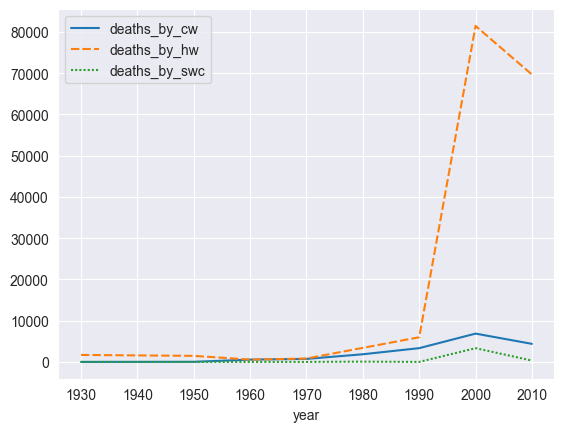

In [480]:
dis_extemp_deaths_per_decade = dis_deaths_per_year_per_subtype.reset_index()
dis_extemp_deaths_per_decade['year'] = dis_extemp_deaths_per_decade['year'] - dis_extemp_deaths_per_decade['year'] % 10
dis_extemp_deaths_per_decade = dis_extemp_deaths_per_decade.groupby('year').sum(numeric_only=True)
dis_extemp_deaths_per_decade.drop([2020], axis=0, inplace=True)
dis_extemp_deaths_per_decade.tail()
sns.lineplot(dis_extemp_deaths_per_decade)
plt.show()

Now we can observe the trend more clearly, the number of deaths by heatwaves has significantly increased since the 1990s.
For the two other subtypes, cold waves and severe winter condition, this is can not be said. Their death toll per year mostly stayed the same. Especially for deaths by cold waves, this is odd, since their number increased the most after the turn of the century.

### Storms

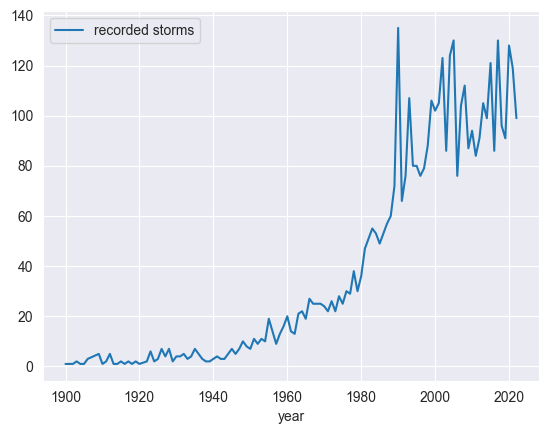

In [481]:
dis_storms_per_year = dis_global[dis_global.type=="Storm"].groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_storms_per_year.rename(columns={'type':'recorded storms'}, inplace=True)
sns.lineplot(data = dis_storms_per_year)
plt.show()

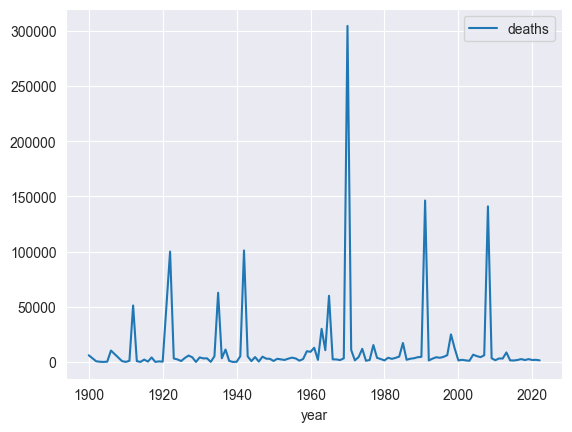

In [482]:
dis_deaths_by_storms_per_year = dis_global[dis_global.type=="Storm"].groupby('year').sum(numeric_only=True)
sns.lineplot(data = dis_deaths_by_storms_per_year)
plt.show()

Like all disasters, the number of recorded storms has drastically increased over the past 100 years.
Noticeable is that the recorded deaths by storms seem to be the most consistent over the years.
Looking at the plot we can see that roughly every 20 years storms occurs which cause a great amount of human casualties.
Maybe this can be linked to the periodical behaviour of storms such as El Niño.

Significant is also the storm in the 1970s which has by far the highest death toll.
Let us take a closer look at this one.

In [483]:
dis_deaths_by_storms_per_year.sort_values(by="deaths", ascending = False).head()

,deaths
year,
1970,304495
1991,146297
2008,140985
1942,101000
1922,100000


This disaster was a storm named the "1970 Bhola cyclone", also known as the "Great Cyclone of 1970" and was a tropcial cyclone that hit East-Pakistan (present-day Bangladesh) and parts of India. It killed as much as 3 million people and went down in history as one of the deadliest natural disasters of all time.
It was the strongest cyclonic storm of the 1970 North Indian Ocean cyclone season.